In [1]:
import pickle

with open("../../results/corrected_result.pkl", "rb") as f:
    result = pickle.load(f)
    print("data length:",len(result))

data length: 2000


In [9]:
import pandas as pd

def extract_biomass_matrix(result):
    """
    从 result 提取 biomass（行：模型，列：环境）
    """
    rows = []
    for env_idx, model_results in result.items():
        for model_id, (biomass, _) in model_results.items():
            rows.append({
                "model_id": model_id,
                "env_idx": env_idx,
                "biomass": biomass
            })
    
    df = pd.DataFrame(rows)
    biomass_matrix = df.pivot(index="model_id", columns="env_idx", values="biomass")
    return biomass_matrix.fillna(0)

biomass_df = extract_biomass_matrix(result)
biomass_df

env_idx,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
model_id,,,,,,,,,,,,,,,,,,,,,
MAG001_gapfilled_noO2,4.637470,53.788062,180.093446,182.854012,136.579079,181.424849,186.817215,136.748957,51.736027,182.717531,...,166.544528,189.436539,8.651965,183.131089,23.032837,30.638144,25.585393,4.430535,71.663099,12.274817
MAG002_gapfilled_noO2,11.890949,137.918107,201.721634,205.623068,203.838299,203.956319,204.494159,200.221946,132.656480,205.086820,...,110.901867,209.943362,7.111706,204.789291,59.058556,78.559345,65.603573,11.360347,183.751535,31.473889
MAG003_gapfilled_noO2,4.637470,12.169564,12.151886,12.394265,12.205488,11.979301,11.982206,11.963983,12.001421,11.987149,...,8.188246,12.539551,2.773565,12.017243,12.083885,11.964615,11.986620,4.430535,12.081468,12.001338
MAG004_gapfilled_noO2,4.637470,53.788062,296.495695,447.021900,136.579079,202.350044,440.068604,136.748957,51.736027,129.159584,...,43.251728,448.262672,2.773565,445.130323,23.032837,30.638144,25.585393,4.430535,71.663099,12.274817
MAG005_gapfilled_noO2,164.078598,137.918107,163.821734,165.915036,164.038737,163.963367,165.783861,163.723924,163.657140,164.653957,...,163.934035,166.314399,22.184525,164.926289,12.972593,78.559345,65.603573,163.694658,165.603918,64.824992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAG236_gapfilled_noO2,11.890949,137.918107,760.245373,1000.000000,350.202766,615.967851,1000.000000,350.638352,210.551242,770.854189,...,427.037251,1000.000000,22.184525,1000.000000,59.058556,78.559345,65.603573,11.360347,183.751535,31.473889
MAG237_gapfilled_noO2,4.637470,53.788062,201.025268,441.578549,136.579079,135.214195,152.538014,136.748957,51.736027,129.159584,...,43.251728,442.804149,2.773565,442.712746,23.032837,30.638144,25.585393,4.430535,71.663099,12.274817
MAG238_gapfilled_noO2,11.890949,133.760113,133.760113,133.760113,133.588749,133.760113,133.760113,71.109931,44.070953,133.760113,...,133.451387,133.760113,22.184525,133.760113,59.058556,41.822192,65.603573,11.360347,91.875768,31.473889


In [2]:
import pandas as pd
import numpy as np

def extract_flux_matrix_with_biomass(result):
    rows = []

    for env_idx, model_results in result.items():
        for model_id, (biomass, fluxes) in model_results.items():
            row = {
                "env_idx": env_idx,
                "model_id": model_id,
                "biomass": biomass
            }
            # 添加 flux 向量（编号为 flux_0, flux_1, ...）
            for i, flux in enumerate(fluxes):
                row[f"flux_{i}"] = float(flux)  
            rows.append(row)

    return pd.DataFrame(rows)

df_model = extract_flux_matrix_with_biomass(result)
print(df_model.shape)
df_model.head()

(480000, 199)


,env_idx,model_id,biomass,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,...,flux_186,flux_187,flux_188,flux_189,flux_190,flux_191,flux_192,flux_193,flux_194,flux_195
0,1,MAG001_gapfilled_noO2,4.637470,-0.066698,-0.033349,-0.033349,0.365213,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,MAG002_gapfilled_noO2,11.890949,-0.066698,-0.033349,-0.033349,0.000000,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,MAG003_gapfilled_noO2,4.637470,-0.066698,-0.033349,-0.033349,0.000000,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,MAG004_gapfilled_noO2,4.637470,-0.066698,-0.033349,-0.033349,0.000000,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,MAG005_gapfilled_noO2,164.078598,-3.000514,-0.460171,-0.460171,0.000000,-0.460171,-0.460171,-0.460171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
### 所有产物 -> biomass ###
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
import pandas as pd

# 准备数据
X = df_model[[c for c in df_model.columns if c.startswith("flux_")]].values
y = df_model["biomass"].values

# 8:2 划分
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 弹性网络建模
enet = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=42)
enet.fit(X_train_scaled, y_train)

# 输出性能
train_r2 = enet.score(X_train_scaled, y_train)
test_r2 = enet.score(X_test_scaled, y_test)
print(f"train R²: {train_r2:.3f}")
print(f"test R²: {test_r2:.3f}")
print("非零系数数:", (enet.coef_ != 0).sum())

train R²: 0.920
test R²: 0.910
非零系数数: 141


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.471e+04, tolerance: 2.369e+04
  model = cd_fast.enet_coordinate_descent(


In [12]:
medium_file = "../../models/group_medium_exchanges.tsv"
df_medium = pd.read_csv(medium_file, sep="\t")
flux_col_mapping = {
    f"flux_{i}": df_medium.iloc[i]["met_name"]
    for i in range(len(df_medium))
}

print(df_medium.head())


           rxn_id       met_id         met_name met_formula
0  EX_cpd10515_e0  cpd10515_e0          Fe+2_e0          Fe
1  EX_cpd00254_e0  cpd00254_e0            Mg_e0          Mg
2  EX_cpd15560_e0  cpd15560_e0  Ubiquinone-8_e0    C49H74O4
3  EX_cpd00069_e0  cpd00069_e0    L-Tyrosine_e0    C9H11NO3
4  EX_cpd00058_e0  cpd00058_e0          Cu2+_e0          Cu


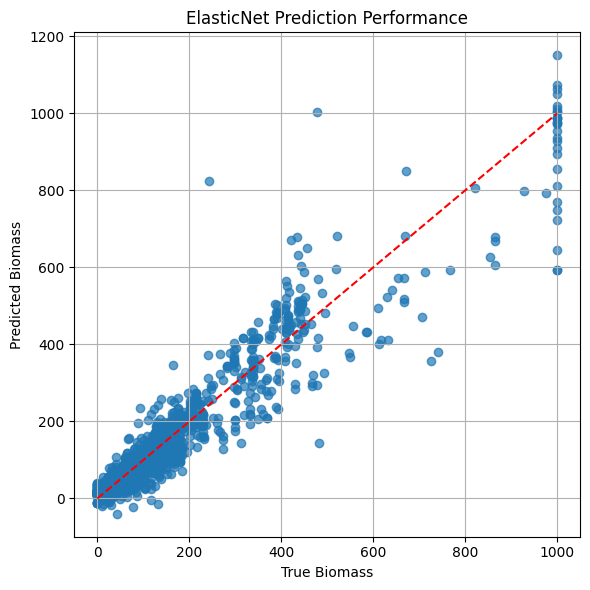

In [21]:
import matplotlib.pyplot as plt

y_pred = enet.predict(X_test_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Biomass")
plt.ylabel("Predicted Biomass")
plt.title("ElasticNet Prediction Performance")
plt.grid(True)
plt.tight_layout()
plt.show()

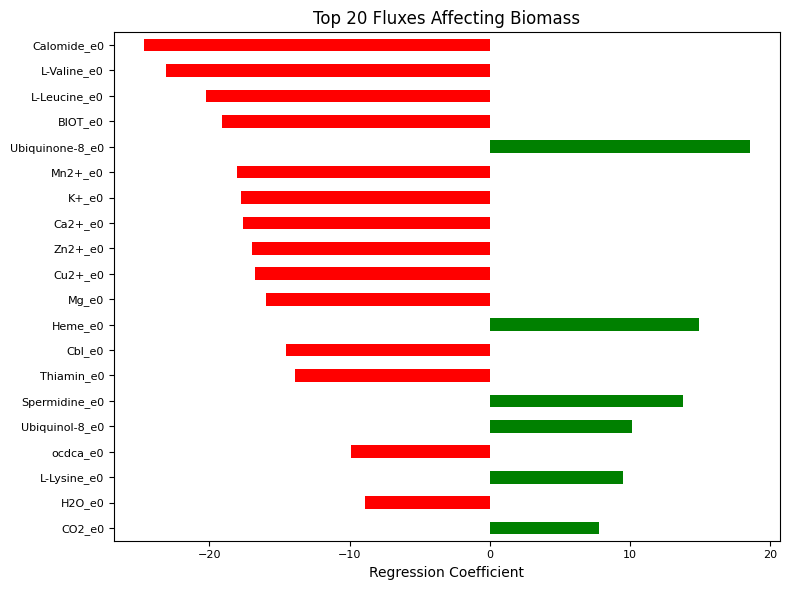

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# 获取非零系数
flux_names = [col for col in df_model.columns if col.startswith("flux_")]
coef_series = pd.Series(enet.coef_, index=flux_names)

# 替换成真实代谢物名
coef_series.index = [flux_col_mapping.get(name, name) for name in coef_series.index]

# 只保留非零项，并按绝对值排序，取 top 20
coef_series = coef_series[~coef_series.index.duplicated(keep='first')]
top_coef = coef_series[coef_series != 0].abs().sort_values(ascending=False)[:20]
top_coef = coef_series.loc[top_coef.index]


# 绘图
plt.figure(figsize=(8, 6))
colors = top_coef.apply(lambda x: "green" if x > 0 else "red")
top_coef.plot(kind="barh", color=colors)

plt.gca().invert_yaxis()  # 最高的在最上面
plt.title("Top 20 Fluxes Affecting Biomass", fontsize=12)
plt.xlabel("Regression Coefficient", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()



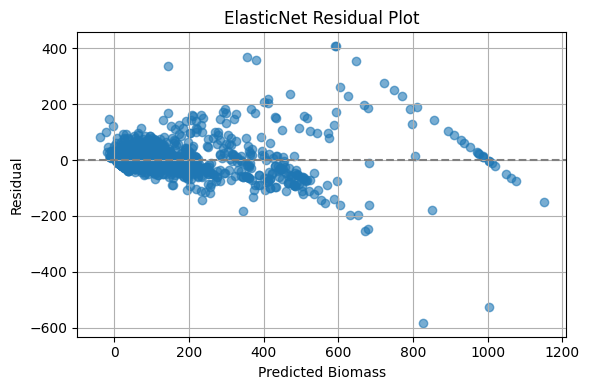

In [26]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Predicted Biomass")
plt.ylabel("Residual")
plt.title("ElasticNet Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


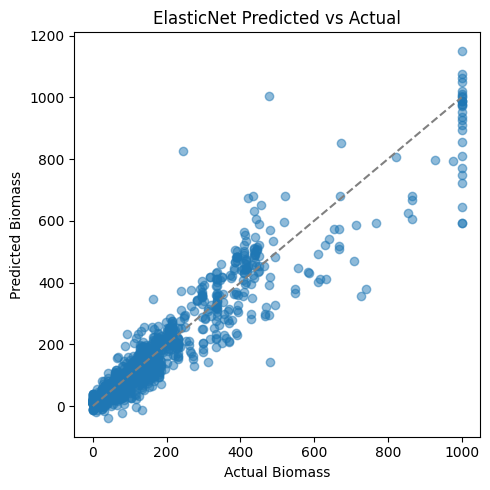

In [27]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, enet.predict(X_test_scaled), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual Biomass")
plt.ylabel("Predicted Biomass")
plt.title("ElasticNet Predicted vs Actual")
plt.tight_layout()
plt.show()


In [ ]:
### VFAs -> biomass ###
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
import pandas as pd

# 目标代谢物名称
target_met_names = ["cpd00029_e0", "cpd00047_e0", "cpd00141_e0"]

medium_file = "../../models/group_medium_exchanges.tsv"
df_medium = pd.read_csv(medium_file, sep="\t")

# 建立 flux_i 和 met_id 的映射关系
flux_col_mapping = {
    f"flux_{i}": df_medium.iloc[i]["met_id"]
    for i in range(len(df_medium))
}

selected_flux_cols = [
    flux_i for flux_i, met_name in flux_col_mapping.items()
    if met_name in target_met_names
]

# 构建新的 X 特征
X_selected = df_model[selected_flux_cols].values
y = df_model["biomass"].values

# 训练测试划分
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 弹性网络建模
enet = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=42)
enet.fit(X_train_scaled, y_train)

# 输出性能
train_r2 = enet.score(X_train_scaled, y_train)
test_r2 = enet.score(X_test_scaled, y_test)
print(f"train R²: {train_r2:.3f}")
print(f"test R²: {test_r2:.3f}")
print("非零系数数:", (enet.coef_ != 0).sum())


train R²: 0.363
test R²: 0.336
非零系数数: 3


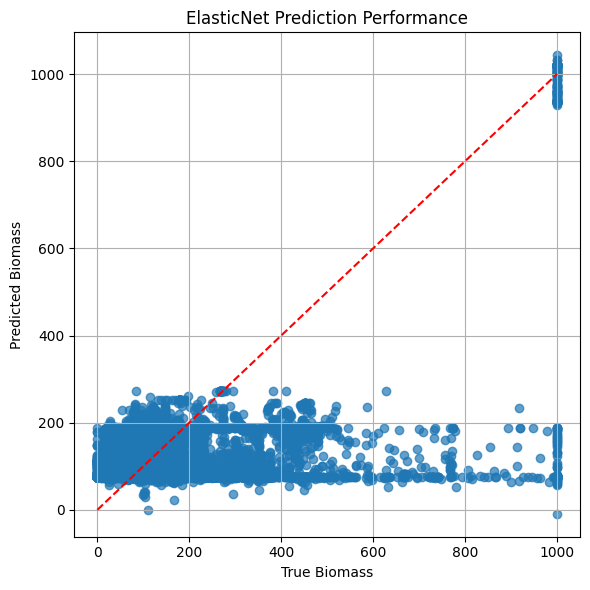

In [9]:
import matplotlib.pyplot as plt

y_pred = enet.predict(X_test_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Biomass")
plt.ylabel("Predicted Biomass")
plt.title("ElasticNet Prediction Performance")
plt.grid(True)
plt.tight_layout()
plt.show()

训练集样本数: 96000, R²: 0.356
训练集样本数: 192000, R²: 0.347
训练集样本数: 288000, R²: 0.345
训练集样本数: 384000, R²: 0.340
训练集样本数: 480000, R²: 0.339


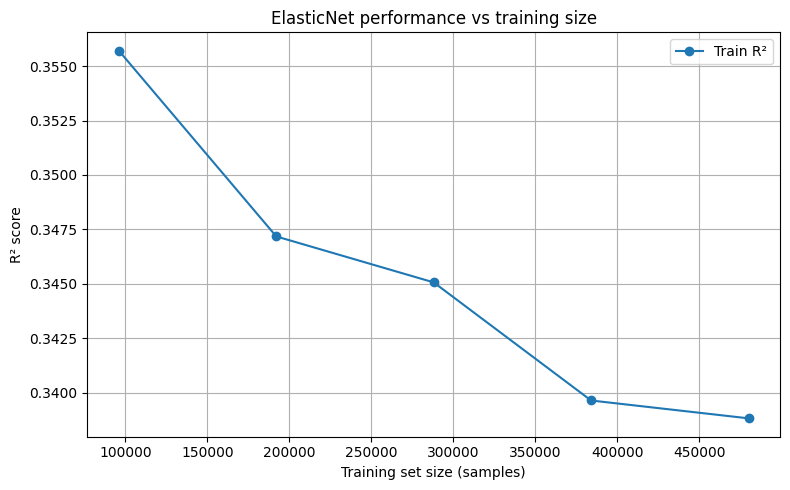

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

# 加载 medium 文件
medium_file = "../../models/group_medium_exchanges.tsv"
df_medium = pd.read_csv(medium_file, sep="\t")

# 构建 met_id 映射
target_met_names = ["cpd00029_e0", "cpd00047_e0", "cpd00141_e0"]
flux_col_mapping = {
    f"flux_{i}": df_medium.iloc[i]["met_id"]
    for i in range(len(df_medium))
}
selected_flux_cols = [
    flux_i for flux_i, met_name in flux_col_mapping.items()
    if met_name in target_met_names
]

# 构建特征和标签
X_full = df_model[selected_flux_cols].values
y_full = df_model["biomass"].values

# 设置不同训练集大小百分比（间隔0.2）
train_sizes = np.linspace(0.2, 1.0, 5)
train_scores = []

for train_size in train_sizes:
    n_train = int(train_size * len(X_full))
    X_train = X_full[:n_train]
    y_train = y_full[:n_train]

    # 标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # 建模
    enet = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=42)
    enet.fit(X_train_scaled, y_train)

    # 记录性能（在训练集上的 R²）
    train_r2 = enet.score(X_train_scaled, y_train)
    train_scores.append(train_r2)

    print(f"训练集样本数: {n_train}, R²: {train_r2:.3f}")

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(train_sizes * len(X_full), train_scores, marker='o', label='Train R²')
plt.xlabel("Training set size (samples)")
plt.ylabel("R² score")
plt.title("ElasticNet performance vs training size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Data ratio: 0.1, Samples: 200, Train R²: 0.787, Test R²: 0.366
Data ratio: 0.2, Samples: 400, Train R²: 0.736, Test R²: 0.836
Data ratio: 0.3, Samples: 600, Train R²: 0.446, Test R²: 0.490
Data ratio: 0.4, Samples: 800, Train R²: 0.415, Test R²: 0.079
Data ratio: 0.5, Samples: 1000, Train R²: 0.324, Test R²: 0.302
Data ratio: 0.6, Samples: 1200, Train R²: 0.318, Test R²: 0.408
Data ratio: 0.7, Samples: 1400, Train R²: 0.332, Test R²: 0.268
Data ratio: 0.8, Samples: 1600, Train R²: 0.365, Test R²: 0.065
Data ratio: 0.9, Samples: 1800, Train R²: 0.339, Test R²: 0.098
Data ratio: 1.0, Samples: 2000, Train R²: 0.277, Test R²: 0.473


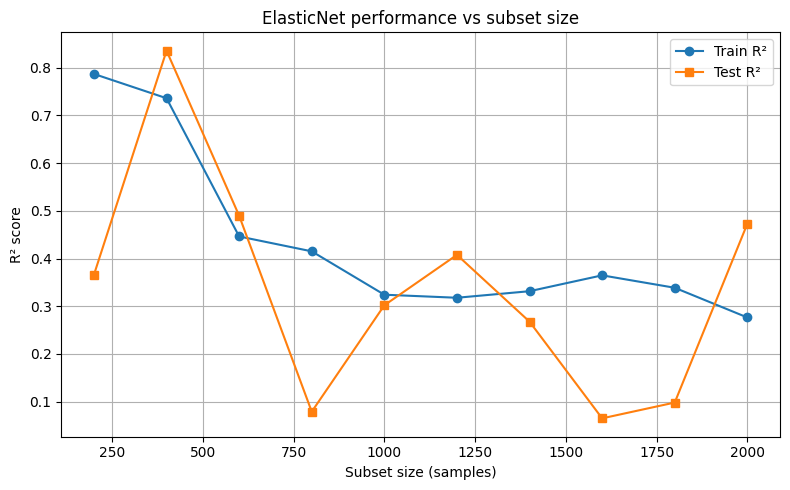

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

data_ratios = np.linspace(0.1, 1.0, 10)

train_scores = []
test_scores = []

for ratio in data_ratios:
    n_samples = int(ratio * 2000)
    X_subset = X_full[:n_samples]
    y_subset = y_full[:n_samples]

    # Split sets (8/2)
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y_subset, test_size=0.2, random_state=42
    )

    # Standard
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train 
    enet = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=42)
    enet.fit(X_train_scaled, y_train)

    # Record 
    train_r2 = enet.score(X_train_scaled, y_train)
    test_r2 = enet.score(X_test_scaled, y_test)
    train_scores.append(train_r2)
    test_scores.append(test_r2)

    print(f"Data ratio: {ratio:.1f}, Samples: {n_samples}, Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")

# Plot
plt.figure(figsize=(8, 5))
sample_counts = data_ratios * 2000
plt.plot(sample_counts, train_scores, marker='o', label='Train R²')
plt.plot(sample_counts, test_scores, marker='s', label='Test R²')
plt.xlabel("Subset size (samples)")
plt.ylabel("R² score")
plt.title("ElasticNet performance vs subset size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# biomsass -> target fluxes
# extract target products
medium_file = "../../models/group_medium_exchanges.tsv"
df_medium = pd.read_csv(medium_file, sep="\t")

target_met_names = ["cpd00029_e0", "cpd00047_e0", "cpd00141_e0"]
flux_col_mapping = {
    f"flux_{i}": df_medium.iloc[i]["met_id"]
    for i in range(len(df_medium))
}

selected_flux_cols = [
    flux_i for flux_i, met_name in flux_col_mapping.items()
    if met_name in target_met_names
]

df_selected = df_model[["env_idx"] + selected_flux_cols]
df_sums = df_selected.groupby("env_idx").sum()
df_sums.columns = [flux_col_mapping[col] for col in df_sums.columns]

print(df_sums)

          cpd00047_e0   cpd00029_e0  cpd00141_e0
env_idx                                         
1         2741.322919  17335.155238     0.001396
2         4986.644256  33869.231159   379.265356
3         7468.443690  53790.824709    61.803180
4        11768.508311  78725.927076  1547.449398
5         7182.724432  46528.636602  1102.959608
...               ...           ...          ...
1996     10286.597759  71303.929081   105.190217
1997      9186.333967  53239.968853    37.948307
1998      4371.883710  63927.921541  2000.000000
1999     11046.726448  50340.380152  1937.648970
2000       566.795162  16940.384534     0.000000

[2000 rows x 3 columns]


In [4]:
df_biomass_matrix = df_model.pivot_table(
    index='env_idx',
    columns='model_id',
    values='biomass',
    fill_value=0
)

X_full = df_biomass_matrix.values  
y_target = df_sums.values

In [ ]:
#build model for each target product
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

data_ratios = np.linspace(0.1, 1.0, 5)

train_scores = []
test_scores = []

for ratio in data_ratios:
    n_samples = int(ratio * X_full.shape[0])
    X_subset = X_full[:n_samples]
    y_subset = y_target[:n_samples]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y_subset, test_size=0.2, random_state=42
    )

    # Standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_r2 = []
    test_r2 = []

    for i in range(y_train.shape[1]):
        model = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=42)
        model.fit(X_train_scaled, y_train[:, i])
        train_r2.append(model.score(X_train_scaled, y_train[:, i]))
        test_r2.append(model.score(X_test_scaled, y_test[:, i]))

    train_scores.append(train_r2)
    test_scores.append(test_r2)
    print(f"Ratio {ratio:.1f}, Samples {n_samples}, Train R² {train_r2}, Test R² {test_r2}")


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.297e+05, tolerance: 1.744e+05
  model = cd_fast.enet_coordinate_descent(
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.155e+05, tolerance: 1.744e+05
  model = cd_fast.enet_coordinate_descent(
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_desc

Ratio 0.1, Samples 200, Train R² [0.9324207218672778, 0.9780326106846667, 0.9230097329279099], Test R² [0.894120919111156, 0.9588895245870223, 0.8623455374036968]


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118850.5365740657, tolerance: 586502.3662389274
  model = cd_fast.enet_coordinate_descent_gram(
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1616363.556547165, tolerance: 586502.3662389274
  model = cd_fast.enet_coordinate_descent_gram(
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number o

Ratio 0.3, Samples 650, Train R² [0.9130441209696268, 0.9712582268986643, 0.8972120466584981], Test R² [0.9383364490988846, 0.9699556682409431, 0.840785901249947]


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.081e+08, tolerance: 1.229e+06
  model = cd_fast.enet_coordinate_descent(
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75889.4293814972, tolerance: 26712.55929287662
  model = cd_fast.enet_coordinate_descent_gram(
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not c

Ratio 0.6, Samples 1100, Train R² [0.9100771953229299, 0.9668288957716753, 0.9025047912505325], Test R² [0.8988893454679332, 0.9678281124819342, 0.8850154608859094]


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.285e+08, tolerance: 1.691e+06
  model = cd_fast.enet_coordinate_descent(
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39954.76655107364, tolerance: 36045.171258586175
  model = cd_fast.enet_coordinate_descent_gram(
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not

Ratio 0.8, Samples 1550, Train R² [0.9058552385883761, 0.9665866428734331, 0.9070491246989422], Test R² [0.9073707290371049, 0.9659159559065682, 0.8913627687981946]


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.643e+08, tolerance: 2.198e+06
  model = cd_fast.enet_coordinate_descent(


Ratio 1.0, Samples 2000, Train R² [0.9050790880656929, 0.967147410525647, 0.903914151817501], Test R² [0.9036518275075988, 0.9603280685690201, 0.9065042956304261]


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.559e+07, tolerance: 5.978e+04
  model = cd_fast.enet_coordinate_descent(


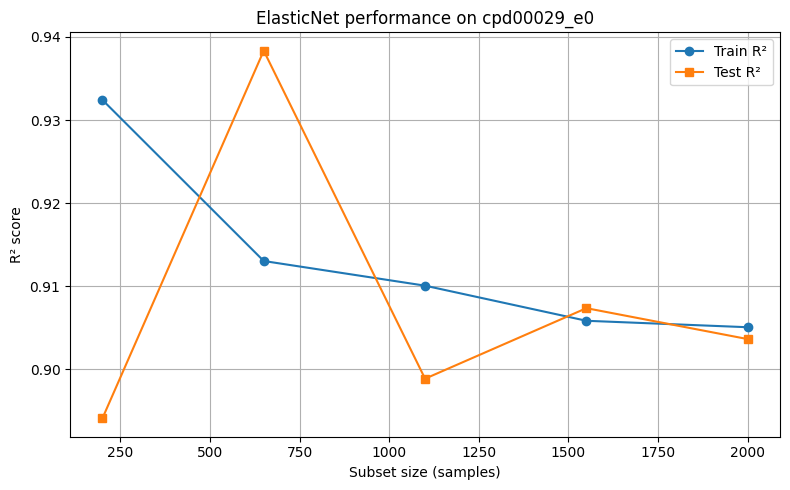

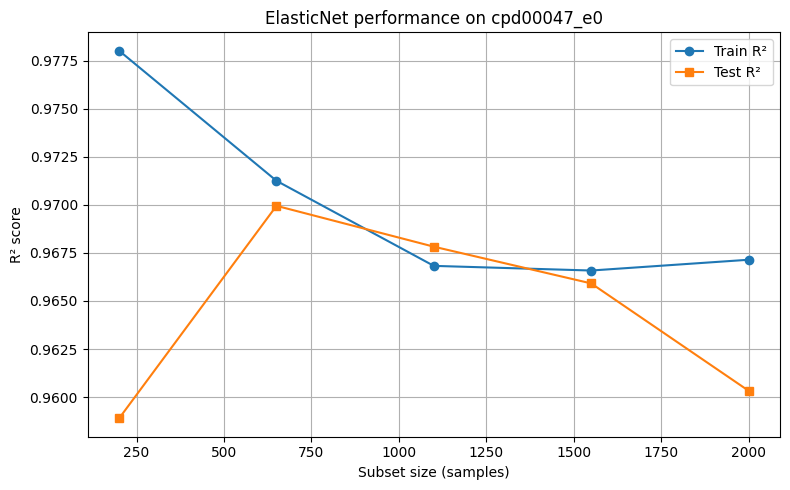

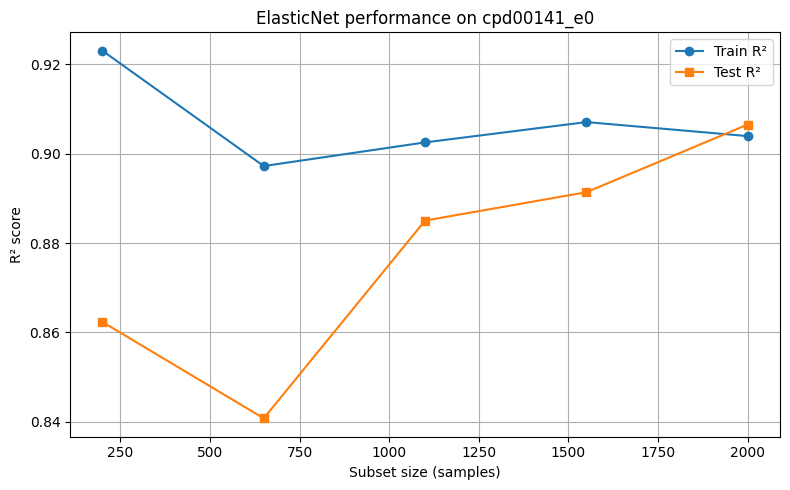

In [8]:
target_mets = ["cpd00029_e0", "cpd00047_e0", "cpd00141_e0"]
sample_counts = data_ratios * X_full.shape[0]

for i, met in enumerate(target_mets):
    plt.figure(figsize=(8, 5))
    plt.plot(sample_counts, [tr[i] for tr in train_scores], marker='o', label='Train R²')
    plt.plot(sample_counts, [te[i] for te in test_scores], marker='s', label='Test R²')
    plt.xlabel("Subset size (samples)")
    plt.ylabel("R² score")
    plt.title(f"ElasticNet performance on {met}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.228e+08, tolerance: 2.198e+06
  model = cd_fast.enet_coordinate_descent(
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.481e+09, tolerance: 6.977e+07
  model = cd_fast.enet_coordinate_descent(


cpd00029_e0: R2 = 0.912, RMSE = 1076.445
cpd00047_e0: R2 = 0.981, RMSE = 2730.420
cpd00141_e0: R2 = 0.907, RMSE = 189.640


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.384e+07, tolerance: 5.978e+04
  model = cd_fast.enet_coordinate_descent(


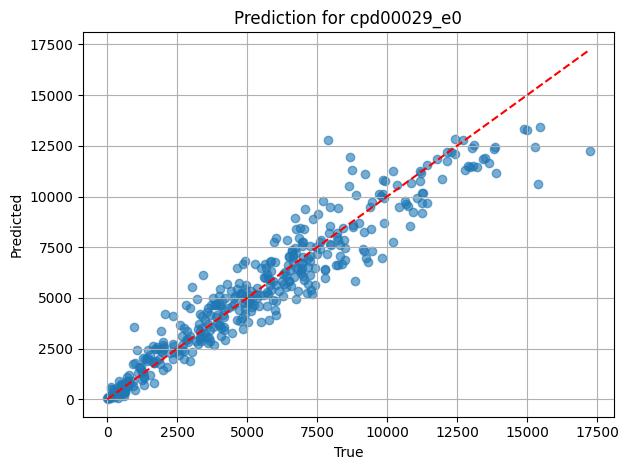

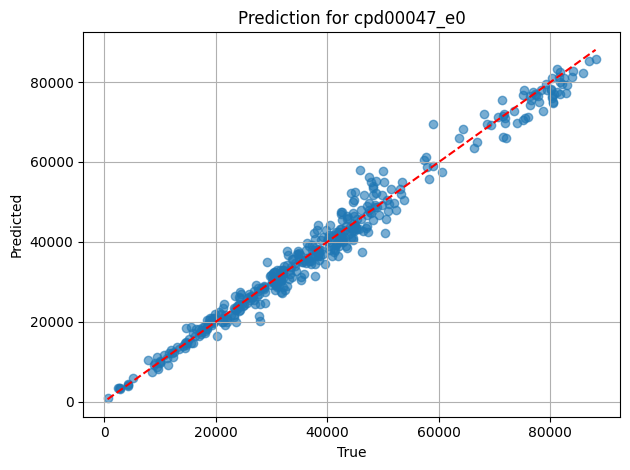

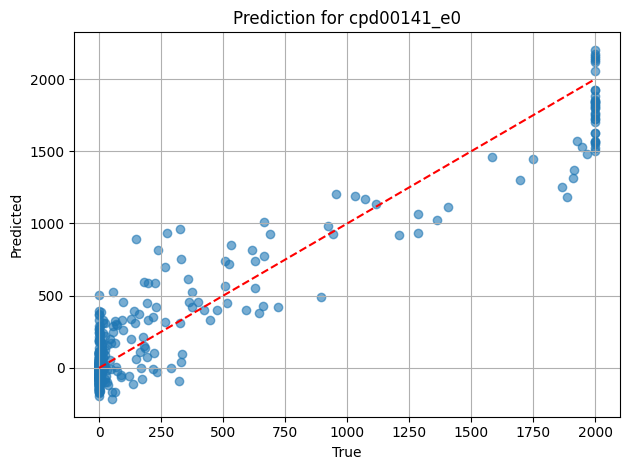

In [16]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# target
target_columns = ["cpd00029_e0", "cpd00047_e0", "cpd00141_e0"]


X_train, X_test, Y_train, Y_test = train_test_split(X_full, y_target, test_size=0.2, random_state=42)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# build model
base_model = ElasticNet(alpha=0.1, max_iter=5000)
model = MultiOutputRegressor(base_model)

# fit
model.fit(X_train_scaled, Y_train)

# predict
Y_pred = model.predict(X_test_scaled)

# evoluate
for i, product in enumerate(target_columns):
    r2 = r2_score(Y_test[:, i], Y_pred[:, i])
    rmse = mean_squared_error(Y_test[:, i], Y_pred[:, i], squared=False)
    print(f"{product}: R2 = {r2:.3f}, RMSE = {rmse:.3f}")

# plot
for i, product in enumerate(target_columns):
    plt.figure()
    plt.scatter(Y_test[:, i], Y_pred[:, i], alpha=0.6)
    plt.plot([Y_test[:, i].min(), Y_test[:, i].max()],
             [Y_test[:, i].min(), Y_test[:, i].max()], 'r--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"Prediction for {product}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [43]:
data_ratios = np.linspace(0.01, 1.0, 5)
n_total_samples = []
train_scores = []
test_scores = []

for ratio in data_ratios:
    n_samples = int(ratio * X_full.shape[0])
    n_total_samples.append(n_samples)
    X_subset = X_full[:n_samples]
    y_subset = y_target[:n_samples]

    # split
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y_subset, test_size=0.2, random_state=42
    )


    # standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # store R²
    train_r2 = []
    test_r2 = []

    for i in range(y_train.shape[1]):
        model = ElasticNetCV(
            cv=5, random_state=42, max_iter=5000
        )
        model.fit(X_train_scaled, y_train[:, i])
        train_r2.append(model.score(X_train_scaled, y_train[:, i]))
        test_r2.append(model.score(X_test_scaled, y_test[:, i]))


    train_scores.append(train_r2)
    test_scores.append(test_r2)

    print(f" Ratio {ratio:.1f} ({n_samples} samples):")
    for j, product in enumerate(target_columns):
        print(f"  {product}: Train R² = {train_r2[j]:.3f}, Test R² = {test_r2[j]:.3f}")


 Ratio 0.0 (20 samples):
  cpd00029_e0: Train R² = 0.982, Test R² = 0.358
  cpd00047_e0: Train R² = 0.954, Test R² = 0.953
  cpd00141_e0: Train R² = 0.884, Test R² = 0.628
 Ratio 0.3 (515 samples):
  cpd00029_e0: Train R² = 0.884, Test R² = 0.908
  cpd00047_e0: Train R² = 0.948, Test R² = 0.944
  cpd00141_e0: Train R² = 0.873, Test R² = 0.791
 Ratio 0.5 (1010 samples):
  cpd00029_e0: Train R² = 0.873, Test R² = 0.902
  cpd00047_e0: Train R² = 0.936, Test R² = 0.941
  cpd00141_e0: Train R² = 0.863, Test R² = 0.854
 Ratio 0.8 (1505 samples):
  cpd00029_e0: Train R² = 0.879, Test R² = 0.865
  cpd00047_e0: Train R² = 0.936, Test R² = 0.933
  cpd00141_e0: Train R² = 0.862, Test R² = 0.846
 Ratio 1.0 (2000 samples):
  cpd00029_e0: Train R² = 0.876, Test R² = 0.879
  cpd00047_e0: Train R² = 0.935, Test R² = 0.926
  cpd00141_e0: Train R² = 0.862, Test R² = 0.865


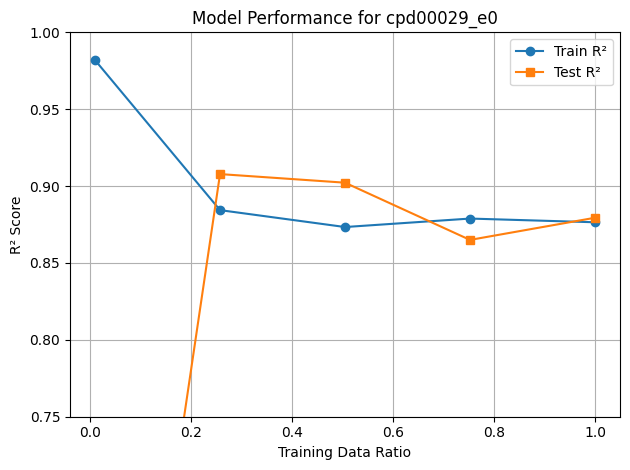

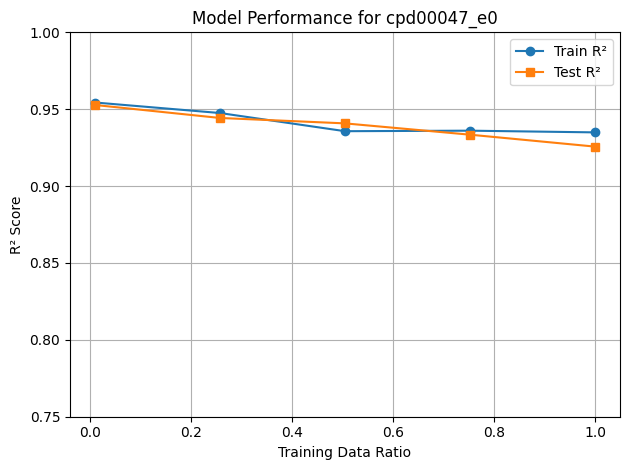

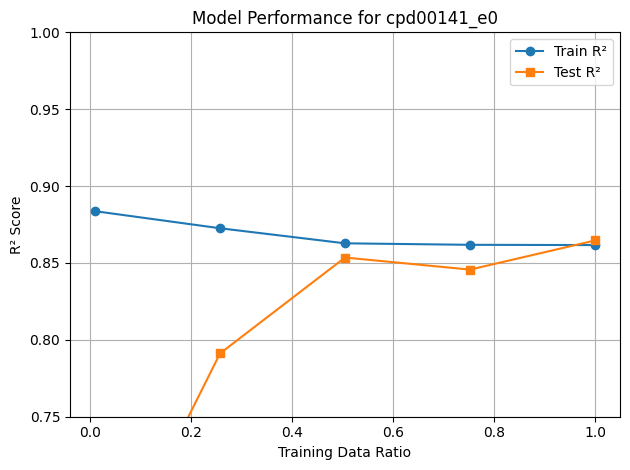

In [44]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

for i, product in enumerate(target_columns):
    plt.figure()
    plt.plot(data_ratios, train_scores[:, i], marker='o', label='Train R²')
    plt.plot(data_ratios, test_scores[:, i], marker='s', label='Test R²')
    plt.xlabel("Training Data Ratio")
    plt.ylabel("R² Score")
    plt.title(f"Model Performance for {product}")
    plt.ylim(0.75, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


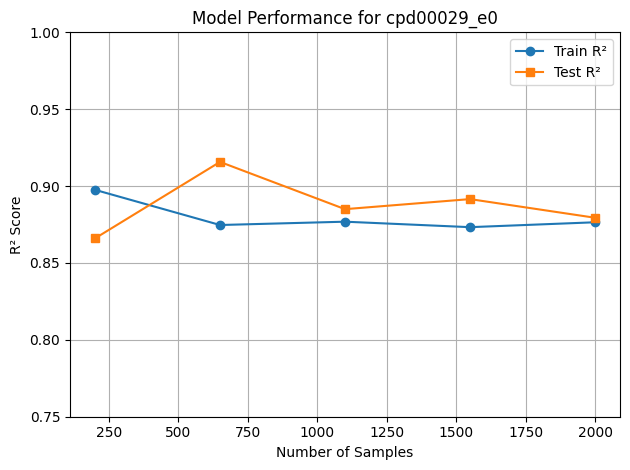

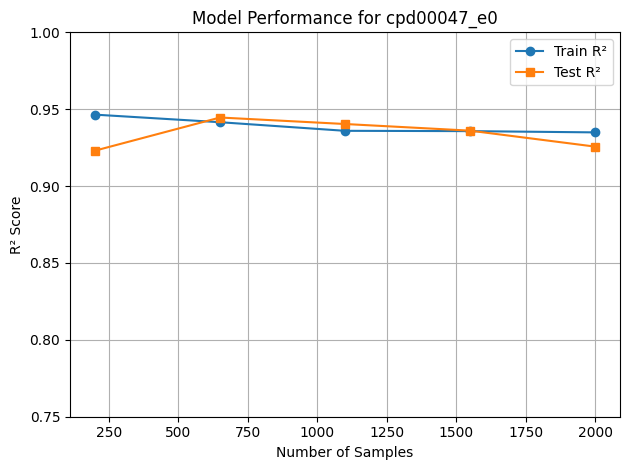

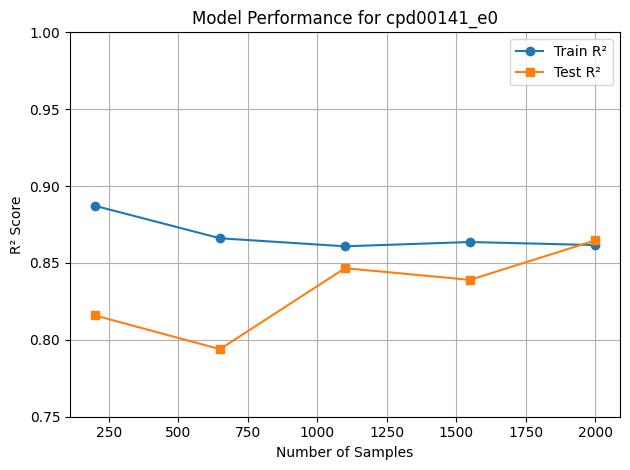

In [41]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

for i, product in enumerate(target_columns):
    plt.figure()
    plt.plot(n_total_samples, train_scores[:, i], marker='o', label='Train R²')
    plt.plot(n_total_samples, test_scores[:, i], marker='s', label='Test R²')
    plt.xlabel("Number of Samples")
    plt.ylabel("R² Score")
    plt.title(f"Model Performance for {product}")
    plt.ylim(0.75, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

